In [20]:
import sys
sys.path.append('..')

In [21]:
%load_ext autoreload
%autoreload 2
from my_code import model as m
from my_code import layers
from my_code import functions as f

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# DATA

In [22]:
from pennylane import numpy as np
file_path = '../data/energies/Trial/Strings_Energies.txt'  # Replace with the actual path to your 'data.txt' file
string_list, number_list = f.read_data_file(file_path)
score_list = np.array(number_list, requires_grad=False)/1000
angles_list = np.array([f.string_to_angles(string) for string in string_list], requires_grad=False)

In [23]:
X, Y = angles_list, score_list

# Model

## Define

In [24]:
circuit_layers = \
    [layers.angle_preparation()] + \
    [layers.rotationX_layer(), layers.rotationZ_layer(), layers.rotationZZ_layer()] * 15 +  \
    [layers.mesurament(qubits=[0])]

In [25]:
import pennylane as qml
SCORE_PREDICTOR = m.model(
    n_qubits = 12, 
    circuit_layers = circuit_layers
)

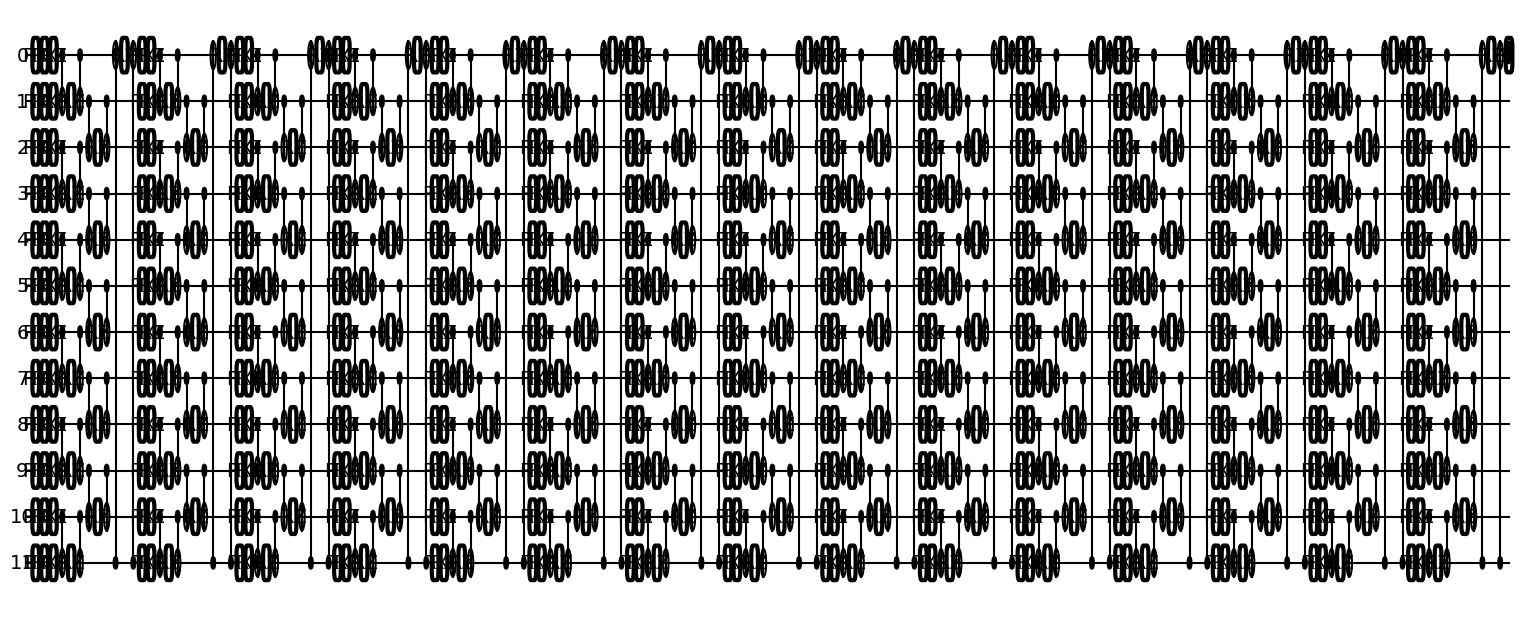

In [26]:
SCORE_PREDICTOR.draw_circuit(size=(15, 6))

## Train

In [27]:
SCORE_PREDICTOR.set_data(    
    data_X = X, 
    data_Y = Y, 
    # data_validation = data_validation
)

In [28]:
np.random.permutation(50)

tensor([27, 14,  4, 22, 21, 28, 19, 31, 48, 44, 32, 34,  8, 17, 25, 40,
         7, 18,  0, 11, 36, 24,  9, 15, 33,  5, 41, 42, 13, 38,  6, 37,
        43, 26,  1, 23, 29, 12, 46, 35, 49, 30, 45, 16, 20,  2, 10, 47,
        39,  3], requires_grad=True)

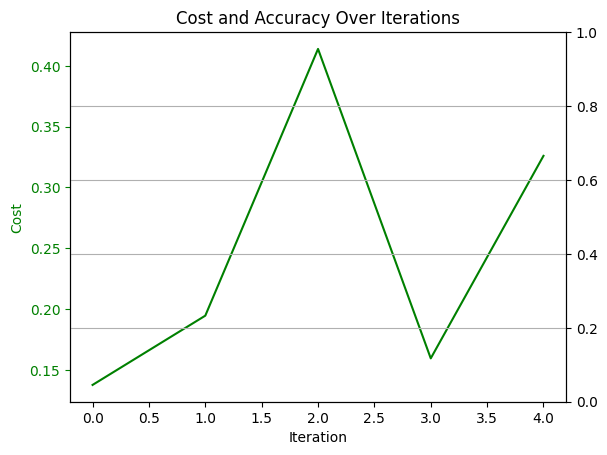

Epoch: 0 | Iter:     5 | Cost: 0.3259595 | Accuracy: 0.6740405 


In [30]:
SCORE_PREDICTOR.train(
    epochs = 100,     
    batch_size = 10,
    optimizer = qml.SPSAOptimizer(maxiter=1000, c=0.15, a=0.2),
    initialize_params=True, 
    plot_options={
        'accuracy': False, 
        'accuracy_validation': False, 
        'plot_every': 5
    }
)

## Try

In [ ]:
# take 20 items from the data set randomly

import random
random.seed(42)
random_index = random.sample(range(0, len(X)), 20)
X_test = X[random_index]
Y_test = Y[random_index]

# predict the score for the 20 items
Y_predicted = [SCORE_PREDICTOR.predict(x) for x in X_test]

In [ ]:
# print the results
for i in range(len(X_test)):
    print("String: {} \tScore: {:.3f} \tPredicted: {:.3f} \tDiference: {:.3f}".format(i, Y_test[i].item(), Y_predicted[i].item(), abs(Y_test[i].item() - Y_predicted[i].item())))

String: 0 	Score: 0.300 	Predicted: -0.028 	Diference: 0.328
String: 1 	Score: 0.667 	Predicted: 0.352 	Diference: 0.315
String: 2 	Score: 0.244 	Predicted: 0.463 	Diference: 0.219
String: 3 	Score: 0.514 	Predicted: 0.354 	Diference: 0.159
String: 4 	Score: 0.006 	Predicted: 0.063 	Diference: 0.057
String: 5 	Score: 0.772 	Predicted: -0.163 	Diference: 0.935
String: 6 	Score: 0.316 	Predicted: 0.330 	Diference: 0.014
String: 7 	Score: 0.581 	Predicted: 0.225 	Diference: 0.356
String: 8 	Score: 0.475 	Predicted: -0.139 	Diference: 0.614
String: 9 	Score: 0.404 	Predicted: 0.156 	Diference: 0.248
String: 10 	Score: 0.587 	Predicted: 0.077 	Diference: 0.510
String: 11 	Score: 0.331 	Predicted: 0.352 	Diference: 0.021
String: 12 	Score: 0.677 	Predicted: -0.118 	Diference: 0.795
String: 13 	Score: 0.153 	Predicted: 0.492 	Diference: 0.339
String: 14 	Score: 0.270 	Predicted: 0.061 	Diference: 0.209
String: 15 	Score: 0.119 	Predicted: 0.141 	Diference: 0.022
String: 16 	Score: 0.449 	Pred